# **Tokenisasi**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

- Parameter num_words adalah jumlah kata yang akan dikonversi ke dalam token/bilangan numerik. Jika parameter num_words diatur sebanyak 15, hanya 15 kata yang paling sering muncul. 15 kata tersebut akan ditokenisasi dari seluruh kata pada dataset. 

- Parameter oov_token adalah parameter yang berfungsi untuk mengganti kata-kata yang tidak ditokenisasi menjadi karakter tertentu. Pada praktiknya, lebih baik untuk mengganti kata yang tidak dikenali dengan suatu kata tertentu dibanding melewatkan kata tersebut untuk mengurangi informasi yang hilang. Hal inilah yang dapat dilakukan dengan menambahkan parameter OOV.

In [ ]:
#buat teks yang akan kita tokenisasi dan kita pakai untuk pelatihan model
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [ ]:
#panggil fungsi fit_on_text() pada objek tokenizer
tokenizer.fit_on_texts(teks)

In [ ]:
#mengubah text yang telah dibuat sebelumnya ke dalam bentuk sequence menggunakan fungsi text_to_sequences
sequences = tokenizer.texts_to_sequences(teks)

In [ ]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


Atribut word index mengembalikan dictionary berupa kata sebagai key dan token atau nilai numeriknya sebagai value. Perlu diperhatikan bahwa tanda baca dan huruf kapital tidak diproses oleh tokenizer. 


Contohnya kata “Selamat!” dan “SELAMAT” akan diperlakukan sebagai kata yang sama. Hasil dari cell di bawah menunjukkan bahwa kata-kata yang out-of-vocabulary akan diberi token bernilai 1. 

In [ ]:
print(tokenizer.texts_to_sequences(['Saya suka programming']))
print(tokenizer.texts_to_sequences(['Saya suka belajar programming sejak SMP']))

[[3, 4, 2]]
[[3, 4, 1, 2, 1, 1]]


Pada contoh tersebut, kata ‘belajar’, ‘sejak’, dan ‘SMP’ ditandai dengan nilai "1". Hal ini menunjukkan bahwa kata-kata tersebut tidak terdapat pada dictionary yang sebelumnya telah dibuat (OOV). Tanpa OOV, kata yang tidak memiliki token tidak dimasukkan pada sequence. Jika kita menggunakan OOV, maka setiap kata yang tidak memiliki token akan diberikan token yang seragam. Dengan OOV, informasi urutan setiap kata pada kalimat tidak hilang.

Setelah tokenisasi, untuk mengubah kalimat ke dalam nilai-nilai yang sesuai dapat dengan menggunakan fungsi text_to_sequence(). Selanjutnya dilakukan adalah padding. Padding adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar. 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)


Untuk menggunakan padding dengan memanggil library pad_sequence terlebih dahulu. Kemudian, panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

In [ ]:
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


Setelah melakukan padding, setiap sequence akan memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek

In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

- Parameter `padding` dengan nilai ‘post’ digunakan jika ingin merubah sehingga 0 ditambahkan di akhir sequence. 

- Parameter `maxlen` adalah panjang maksimum setiap sequence, dapat diisi dengan nilai yang kita inginkan. Jika kita mengisi nilai 5, maka panjang sebuah sequence tidak akan melebihi 5. 

In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

Parameter truncating dan mengisi nilai ‘post’, untuk mengambil 5 kata awal dari tiap kalimat. 

Jika teks memiliki panjang lebih dari nilai parameter maxlen misalnya 5, maka secara default nilai dari sequence akan diambil 5 nilai terakhir atau 5 kata terakhir saja dari setiap kalimat (mengabaikan kata sebelumnya). 

# **Embedding**

Embedding memungkinkan model ML untuk memahami makna di setiap kata dan mengelompokkan kata-kata dengan makna yang mirip agar berdekatan. Pengelompokkan ini dapat dicapai dengan memetakan setiap kata ke dalam vektor atau larik. Di mana kata yang mirip akan memiliki nilai vektor yang mirip. 

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(jumlah_kata, dimensi_embedding, panjang_input),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NameError: ignored

Pada model sequential, kita tinggal memanggil fungsi Embedding() dan mengisi parameter  
`jumlah_kata` = total kata yang di tokenisasi  
`panjang_input` = panjang kalimat,  
`dimensi embedding`

Karena hasil dari embedding merupakan larik 2 dimensi yang berisi panjang setiap kalimat, dan dimensi embedding, maka kita memerlukan fungsi flatten().

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(padded_latih, label_latih, 
          epochs=num_epochs, 
          validation_data=(padded_test, label_test))

Untuk fungsi fit, kita memerlukan parameter  
`padded_latih` = teks yang telah di-padding,   
`label_latih` = label dari data training,   
`epochs` = jumlah epoch,  
`validation_data` = serta data validasi. 

# **Binary Classification**

In [ ]:
import pandas as pd
df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

FileNotFoundError: ignored

In [ ]:
df.tail()

In [ ]:
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

Agar teks dapat dipahami oleh model, kita harus lakukan tokenisasi. Gunakan fungsi tokenizer pada data latih dan data test. Jangan lupa gunakan fungsi pad_sequences agar setiap sequence sama panjang.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=250, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Untuk arsitektur model kita menggunakan layer Embedding dengan,  
`input_dim` = dimensi dari input sebesar nilai num_words pada objek tokenizer  
`output_dim` = dimensi embedding sebesar 16


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

# **Multiclass**

In [ ]:
import pandas as pd
df = pd.read_csv('SPAM text message.csv')


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Karena label kita berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding.

In [ ]:
category = pd.get_dummies(df.Category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Message,ham,spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,1
5568,Will ü b going to esplanade fr home?,1,0
5569,"Pity, * was in mood for that. So...any other s...",1,0
5570,The guy did some bitching but I acted like i'd...,1,0


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [ ]:
sinopsis = df_baru['Message'].values
label = df_baru[['ham', 'spam']].values

In [ ]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=6000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

Untuk arsitektur model kita menggunakan layer Embedding dengan,  
`input_dim` = dimensi dari input sebesar nilai num_words pada objek tokenizer  
`output_dim` = dimensi embedding sebesar 16

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=6000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fungsi callback untuk menghentikan epoch apabila akurasi sudah mencapai 98%
class toCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99 and logs.get('accuracy')==1.00):
      print("Proses Training Berhenti, Tingkat Akurasi Sudah Lebih Dari 98%")
      self.model.stop_training = True

callbacks= toCallback()

In [ ]:
num_epochs = 15
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/15
140/140 - 16s - loss: 0.2331 - accuracy: 0.9190 - val_loss: 0.0659 - val_accuracy: 0.9812 - 16s/epoch - 116ms/step
Epoch 2/15
140/140 - 13s - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0543 - val_accuracy: 0.9821 - 13s/epoch - 96ms/step
Epoch 3/15
140/140 - 14s - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0457 - val_accuracy: 0.9901 - 14s/epoch - 99ms/step
Epoch 4/15
140/140 - 13s - loss: 0.0073 - accuracy: 0.9973 - val_loss: 0.0466 - val_accuracy: 0.9865 - 13s/epoch - 96ms/step
Epoch 5/15
140/140 - 13s - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0528 - val_accuracy: 0.9901 - 13s/epoch - 93ms/step
Epoch 6/15
140/140 - 14s - loss: 5.1291e-04 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9901 - 14s/epoch - 97ms/step
Epoch 7/15
140/140 - 13s - loss: 9.6180e-05 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9901 - 13s/epoch - 95ms/step
Epoch 8/15
140/140 - 13s - loss: 3.1360e-05 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9883 - 13s/epoch

**BATCH LOADING**

In [ ]:
num_epochs = 15
history = model.fit(padded_latih, label_latih, epochs=num_epochs, batch_size=256, 
                    validation_data=(padded_test, label_test), verbose=2)


Epoch 1/15
18/18 - 8s - loss: 7.4405e-07 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9892 - 8s/epoch - 455ms/step
Epoch 2/15
18/18 - 7s - loss: 7.3445e-07 - accuracy: 1.0000 - val_loss: 0.1259 - val_accuracy: 0.9892 - 7s/epoch - 381ms/step
Epoch 3/15
18/18 - 7s - loss: 7.2547e-07 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9892 - 7s/epoch - 380ms/step
Epoch 4/15
18/18 - 7s - loss: 7.1613e-07 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9892 - 7s/epoch - 394ms/step
Epoch 5/15
18/18 - 7s - loss: 7.0699e-07 - accuracy: 1.0000 - val_loss: 0.1264 - val_accuracy: 0.9892 - 7s/epoch - 385ms/step
Epoch 6/15
18/18 - 7s - loss: 6.9808e-07 - accuracy: 1.0000 - val_loss: 0.1265 - val_accuracy: 0.9892 - 7s/epoch - 391ms/step
Epoch 7/15
18/18 - 7s - loss: 6.9003e-07 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9892 - 7s/epoch - 393ms/step
Epoch 8/15
18/18 - 7s - loss: 6.8083e-07 - accuracy: 1.0000 - val_loss: 0.1268 - val_accuracy: 0.9892 - 7s/epoch - 389

**CALLBACK**

In [ ]:
num_epochs = 10
history = model.fit(padded_latih, label_latih, epochs=num_epochs, batch_size=32, 
                    validation_data=(padded_test, label_test), verbose=2,
callbacks=[callbacks]) # memanggil fungsi callback



Epoch 1/10
140/140 - 13s - loss: 1.4836e-06 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9883 - 13s/epoch - 96ms/step
Epoch 2/10
140/140 - 13s - loss: 1.1713e-06 - accuracy: 1.0000 - val_loss: 0.1493 - val_accuracy: 0.9883 - 13s/epoch - 92ms/step
Epoch 3/10
140/140 - 15s - loss: 9.5628e-07 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.9883 - 15s/epoch - 107ms/step
Epoch 4/10
140/140 - 13s - loss: 7.6574e-07 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9883 - 13s/epoch - 94ms/step
Epoch 5/10
140/140 - 13s - loss: 6.4079e-07 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 0.9883 - 13s/epoch - 93ms/step
Epoch 6/10
140/140 - 13s - loss: 5.3984e-07 - accuracy: 1.0000 - val_loss: 0.1589 - val_accuracy: 0.9883 - 13s/epoch - 94ms/step
Epoch 7/10
140/140 - 13s - loss: 4.5773e-07 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9883 - 13s/epoch - 94ms/step
Epoch 8/10
140/140 - 13s - loss: 3.9757e-07 - accuracy: 1.0000 - val_loss: 0.1629 - val_accuracy

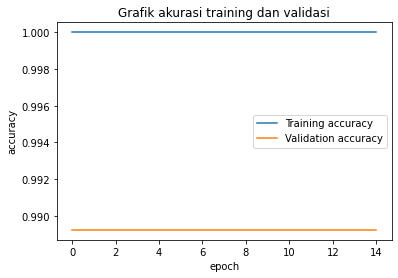

<Figure size 432x288 with 0 Axes>

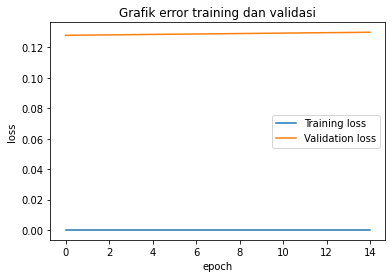

<Figure size 432x288 with 0 Axes>

In [ ]:
# membuat grafik akurasi data training dan validasi
import matplotlib.pyplot as plt

akurasi = history.history['accuracy']
val_akurasi = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(akurasi))

plt.plot(epoch_range, akurasi, label='Training accuracy')
plt.plot(epoch_range, val_akurasi, label='Validation accuracy')
plt.title('Grafik akurasi training dan validasi')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Grafik error training dan validasi')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()